# 👩‍✈️ About this tutorial

`molfeat` is a Python library designed for molecular featurization and cheminformatics. `molfeat` provides a comprehensive set of tools to convert **molecular structures into numerical representations**, making it easier to apply machine learning models to chemical and materials data.

➡ `molfeat` comes super handy when we want to test a simple model with different features (descriptors and fingerprints). `molfeat` can help us to get a quick idea of how challenging it might be to model the data.

`molfeat` offers:
* Pre-trained models
* **Molecular fingerprints** <<-- On this tutorial
* Featurization methods tailored for different tasks, such as QSPR and QSAR.

In this tutorial, we'll walk through a practical example, starting from
1. Loading molecular data,
2. Applying `molfeat` to generate molecular descriptors
3. Using these features to build and evaluate a predictive model

# Mount Drive

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Modules

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# Show all the columns of the dataframe
pd.set_option('display.max_columns', None)

# Show all the rows of the dataframe
pd.set_option('display.max_rows', None)

# Packages

In [3]:
!pip install rdkit==2024.09.4 # RDKit in EDA was rdkit-2024.9.4 so we shall install the same version
!pip install datamol
!pip install molfeat
!pip install yellowbrick

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.4/495.4 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 4.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.3/165.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 

# Data

In [17]:
# Load the pre-processed dataset (the one from CANONICAL SMILES)
# Path to dataset (change the path according to your Google Drive folders)
file_path = '/content/drive/Shared drives/99_Share/99_share_業務委託(Team Chen)/Preinterns (Elisa)/pint_iker_udem/datasets/Dataset1/CSD_EES_DB_with_canon_smiles.csv'

In [18]:
# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)
data.head(10)

Unnamed: 0        ID                               doi            formula  \
0           0  AACFAZ10         10.1107/S0108270183005156  C26 H22 Cl2 N2 O6   
1           1    ABACIR         10.1107/S160053681103861X   C17 H21 N3 O4 S2   
2           2    ABADEO         10.1107/S1600536811039158      C30 H28 N6 O2   
3           3    ABADUE         10.1107/S1600536811039110      C17 H17 N1 O4   
4           4    ABAGAN         10.1107/S1600536811038177      C26 H17 O1 P1   
5           5    ABAGIV         10.1107/S1600536811037846      C15 H15 N3 O2   
6           6    ABAJUK         10.1107/S1600536811039195  C18 H16 Br1 N3 O3   
7           7    ABAKIZ         10.1107/S1600536811035884      C14 H11 F1 N2   
8           8    ABALUM         10.1107/S1600536811037020   C10 H9 Cl1 N4 O1   
9           9  ABAMEX01  10.1016/j.jorganchem.2013.10.003      C23 H20 N4 O1   

   NAts                                             SMILES      HOMO  \
0  36.0  COC1=C(C(OC1=O)c1ccccc1Cl)C(C)=NN=C(C)C1=C(OC)... -7.548438   
1  26.0     O=N(=O)c1ccccc1NCC1=CSC(=C1)S(=O)(=O)NC1CCCCC1 -7.675787   
2  38.0  CN1N(c2ccccc2)C(=O)C(=C1C)N=Cc1ccccc1C=NC1=C(C... -6.603659   
3  22.0               COc1cc(OC)c(C=CC(=O)c2ccccn2)c(OC)c1 -6.790057   
4  28.0        O=P1(c2ccccc2)c2ccc3ccccc3c2c2c3ccccc3ccc12 -7.067613   
5  20.0                  Cc1ccccc1NN=C(C)c1cccc(c1)N(=O)=O -6.770193   
6  25.0          COc1cc(Br)cc(C=NNC(=O)CC2=CNc3ccccc23)c1O -6.843935   
7  17.0                      CCC(C=Cc1ccc(F)cc1)=C(C#N)C#N -7.989807   
8  16.0                       CC1=NNC(=O)C1=NNc1ccc(Cl)cc1 -7.268433   
9  28.0      CC1=NN(C(=O)C1=C(Nc1ccccc1N)c1ccccc1)c1ccccc1 -6.608013   

       LUMO   E(S1)   f(S1)   E(S2)   f(S2)   E(S3)   f(S3)   E(T1)   E(T2)  \
0 -1.912144  3.1382  0.0027  3.8297  1.1448  4.5310  0.0000  2.2270  2.8977   
1 -1.725202  3.6720  0.0982  3.7456  0.0888  4.1316  0.0016  2.3255  2.8794   
2 -0.762191  3.9027  0.7900  4.0170  0.2765  4.1450  0.0455  2.6892  3.0039   
3 -0.969814  3.3127  0.0001  3.9203  0.7088  4.6824  0.0265  2.5848  2.9294   
4 -1.419890  3.6197  0.1814  4.2742  0.0073  4.4154  0.0007  2.5192  3.2095   
5 -1.357576  3.8514  0.0122  3.8722  0.2300  4.3338  0.5578  2.5031  2.7975   
6 -0.841104  4.4786  0.0924  4.7004  0.0024  4.8926  0.8307  3.1227  3.7217   
7 -2.221265  4.0097  1.0049  5.0388  0.0000  5.4572  0.1008  2.3521  3.7973   
8 -1.702072  3.5080  0.2448  3.6126  0.2456  4.2577  0.2544  1.7799  3.1298   
9 -1.017434  3.5670  0.2410  4.0175  0.2172  4.4869  0.0646  2.3688  3.5163   

    E(T3)                                       canon_SMILES  
0  3.0885  COC1=C(C(C)=NN=C(C)C2=C(OC)C(=O)OC2c2ccccc2Cl)...  
1  3.2735  O=[N+]([O-])c1ccccc1NCc1csc(S(=O)(=O)NC2CCCCC2)c1  
2  3.5964  Cc1c(N=Cc2ccccc2C=Nc2c(C)n(C)n(-c3ccccc3)c2=O)...  
3  3.9060               COc1cc(OC)c(C=CC(=O)c2ccccn2)c(OC)c1  
4  3.8388       O=P1(c2ccccc2)c2ccc3ccccc3c2-c2c1ccc1ccccc21  
5  3.3850             CC(=NNc1ccccc1C)c1cccc([N+](=O)[O-])c1  
6  3.7772        COc1cc(Br)cc(C=NNC(=O)Cc2c[nH]c3ccccc23)c1O  
7  4.5994                      CCC(C=Cc1ccc(F)cc1)=C(C#N)C#N  
8  3.3609                       CC1=NNC(=O)C1=NNc1ccc(Cl)cc1  
9  3.9357      CC1=NN(c2ccccc2)C(=O)C1=C(Nc1ccccc1N)c1ccccc1

In [19]:
# Drop the 'Unnamed: 0' column
data.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
data.head()

ID                        doi            formula  NAts  \
0  AACFAZ10  10.1107/S0108270183005156  C26 H22 Cl2 N2 O6  36.0   
1    ABACIR  10.1107/S160053681103861X   C17 H21 N3 O4 S2  26.0   
2    ABADEO  10.1107/S1600536811039158      C30 H28 N6 O2  38.0   
3    ABADUE  10.1107/S1600536811039110      C17 H17 N1 O4  22.0   
4    ABAGAN  10.1107/S1600536811038177      C26 H17 O1 P1  28.0   

                                              SMILES      HOMO      LUMO  \
0  COC1=C(C(OC1=O)c1ccccc1Cl)C(C)=NN=C(C)C1=C(OC)... -7.548438 -1.912144   
1     O=N(=O)c1ccccc1NCC1=CSC(=C1)S(=O)(=O)NC1CCCCC1 -7.675787 -1.725202   
2  CN1N(c2ccccc2)C(=O)C(=C1C)N=Cc1ccccc1C=NC1=C(C... -6.603659 -0.762191   
3               COc1cc(OC)c(C=CC(=O)c2ccccn2)c(OC)c1 -6.790057 -0.969814   
4        O=P1(c2ccccc2)c2ccc3ccccc3c2c2c3ccccc3ccc12 -7.067613 -1.419890   

    E(S1)   f(S1)   E(S2)   f(S2)   E(S3)   f(S3)   E(T1)   E(T2)   E(T3)  \
0  3.1382  0.0027  3.8297  1.1448  4.5310  0.0000  2.2270  2.8977  3.0885   
1  3.6720  0.0982  3.7456  0.0888  4.1316  0.0016  2.3255  2.8794  3.2735   
2  3.9027  0.7900  4.0170  0.2765  4.1450  0.0455  2.6892  3.0039  3.5964   
3  3.3127  0.0001  3.9203  0.7088  4.6824  0.0265  2.5848  2.9294  3.9060   
4  3.6197  0.1814  4.2742  0.0073  4.4154  0.0007  2.5192  3.2095  3.8388   

                                        canon_SMILES  
0  COC1=C(C(C)=NN=C(C)C2=C(OC)C(=O)OC2c2ccccc2Cl)...  
1  O=[N+]([O-])c1ccccc1NCc1csc(S(=O)(=O)NC2CCCCC2)c1  
2  Cc1c(N=Cc2ccccc2C=Nc2c(C)n(C)n(-c3ccccc3)c2=O)...  
3               COc1cc(OC)c(C=CC(=O)c2ccccn2)c(OC)c1  
4       O=P1(c2ccccc2)c2ccc3ccccc3c2-c2c1ccc1ccccc21

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47360 entries, 0 to 47359
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            47360 non-null  object 
 1   doi           42548 non-null  object 
 2   formula       47360 non-null  object 
 3   NAts          47360 non-null  float64
 4   SMILES        47360 non-null  object 
 5   HOMO          47360 non-null  float64
 6   LUMO          47360 non-null  float64
 7   E(S1)         47360 non-null  float64
 8   f(S1)         47360 non-null  float64
 9   E(S2)         47360 non-null  float64
 10  f(S2)         47360 non-null  float64
 11  E(S3)         47360 non-null  float64
 12  f(S3)         47360 non-null  float64
 13  E(T1)         47360 non-null  float64
 14  E(T2)         47360 non-null  float64
 15  E(T3)         47360 non-null  float64
 16  canon_SMILES  47360 non-null  object 
dtypes: float64(12), object(5)
memory usage: 6.1+ MB


## Band gap


In [51]:
# We can predict HOMO and LUMO separately and then subtract HOMO from LUMO (LUMO-HUMO) for each data point to get the Band Gap.
# But we can also first do the substraction and predict the Band Gap.
# In this example, I will opt for the second option (predict the band gap)

data['band_gap'] = data['LUMO'] - data['HOMO']

# Drop the cols LUMO and HOMO
data.drop(columns=['LUMO', 'HOMO'], inplace=True)

In [10]:
# View the df
data.head(4)

ID                        doi            formula  NAts  \
0  AACFAZ10  10.1107/S0108270183005156  C26 H22 Cl2 N2 O6  36.0   
1    ABACIR  10.1107/S160053681103861X   C17 H21 N3 O4 S2  26.0   
2    ABADEO  10.1107/S1600536811039158      C30 H28 N6 O2  38.0   
3    ABADUE  10.1107/S1600536811039110      C17 H17 N1 O4  22.0   

                                              SMILES   E(S1)   f(S1)   E(S2)  \
0  COC1=C(C(OC1=O)c1ccccc1Cl)C(C)=NN=C(C)C1=C(OC)...  3.1382  0.0027  3.8297   
1     O=N(=O)c1ccccc1NCC1=CSC(=C1)S(=O)(=O)NC1CCCCC1  3.6720  0.0982  3.7456   
2  CN1N(c2ccccc2)C(=O)C(=C1C)N=Cc1ccccc1C=NC1=C(C...  3.9027  0.7900  4.0170   
3               COc1cc(OC)c(C=CC(=O)c2ccccn2)c(OC)c1  3.3127  0.0001  3.9203   

    f(S2)   E(S3)   f(S3)   E(T1)   E(T2)   E(T3)  \
0  1.1448  4.5310  0.0000  2.2270  2.8977  3.0885   
1  0.0888  4.1316  0.0016  2.3255  2.8794  3.2735   
2  0.2765  4.1450  0.0455  2.6892  3.0039  3.5964   
3  0.7088  4.6824  0.0265  2.5848  2.9294  3.9060   

                                        canon_SMILES  band_gap  
0  COC1=C(C(C)=NN=C(C)C2=C(OC)C(=O)OC2c2ccccc2Cl)...  5.636294  
1  O=[N+]([O-])c1ccccc1NCc1csc(S(=O)(=O)NC2CCCCC2)c1  5.950586  
2  Cc1c(N=Cc2ccccc2C=Nc2c(C)n(C)n(-c3ccccc3)c2=O)...  5.841468  
3               COc1cc(OC)c(C=CC(=O)c2ccccn2)c(OC)c1  5.820243

# Use molfeat

From the [docs](https://https://molfeat-docs.datamol.io/stable/usage.html): Molfeat is organized in three main modules:
* molfeat.store: The model store loads, lists and registers all featurizers.
* molfeat.calc: A calculator is a callable that featurizes a single molecule.
* molfeat.trans: A transformer is a scikit-learn compatible class that wraps a calculator in a featurization pipeline.

In [14]:
from molfeat.calc import FP_FUNCS
from molfeat.calc import FPCalculator

# Check all the fps available
fp_funcs = FP_FUNCS.keys()
print(fp_funcs)

# Instantiate a Fingerprint Calculator
calc = FPCalculator("avalon")

dict_keys(['maccs', 'avalon', 'pattern', 'layered', 'map4', 'secfp', 'erg', 'estate', 'avalon-count', 'ecfp', 'fcfp', 'topological', 'atompair', 'rdkit', 'ecfp-count', 'fcfp-count', 'topological-count', 'atompair-count', 'rdkit-count'])


In [15]:
# Instantiate a Molecule Transfomer from molfeat.
# This object takes a list of SMILES as input and returns descriptors
from molfeat.trans import MoleculeTransformer

mol_transf = MoleculeTransformer(calc, n_jobs=-1)

In [23]:
%%time
# Prepare the smiles
smiles_ls = data['canon_SMILES'].tolist()

# Calculate the fingerprints avalon
mol_transf(smiles_ls)

CPU times: user 12 s, sys: 245 ms, total: 12.2 s
Wall time: 1min 11s


[array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
        0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 

In [26]:
# Optional
# Easily save the avalon featurizer
mol_transf.to_state_yaml_file("state_dict.yml")

# Easily load the avalon featurizer
mol_transf = MoleculeTransformer.from_state_yaml_file("state_dict.yml")
# Use the loaded avalon featurizer
mol_transf(smiles_ls) # <<-- same results as in previous cell

[array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
        0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 

## Try with multiple fingerprints and save them

In [27]:
# Define multiple featurizers
featurizers = [
    FPCalculator("ecfp"),           # Morgan fingerprint
    FPCalculator("maccs"),          # MACCS keys
    FPCalculator("rdkit"),          # RDKit fingerprint
]

# Create a MoleculeTransformer for each featurizer
mol_transf_list = [MoleculeTransformer(calc, n_jobs=-1) for calc in featurizers]

In [28]:
# Save each featurizer
for i, mol_transf in enumerate(mol_transf_list):
    filename = f"state_dict_{i}.yml"
    mol_transf.to_state_yaml_file(filename)
    print(f"Saved featurizer to {filename}")

Saved featurizer to state_dict_0.yml
Saved featurizer to state_dict_1.yml
Saved featurizer to state_dict_2.yml


In [31]:
# Load and test a featurizer
mol_transf = MoleculeTransformer.from_state_yaml_file("state_dict_0.yml") # Loads ecfp featurizer
result = mol_transf(smiles_ls)
result

[array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 1, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 1, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 1, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 1, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 1, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 1, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 1, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 1, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 1, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dt

# Predict

In [43]:
# Instantiate an sklearn regressor
from xgboost import XGBRegressor
model = XGBRegressor()

In [52]:
# Prepare the data with the fp
data['fp']=result
data.head(1)

ID                        doi            formula  NAts  \
0  AACFAZ10  10.1107/S0108270183005156  C26 H22 Cl2 N2 O6  36.0   

                                              SMILES   E(S1)   f(S1)   E(S2)  \
0  COC1=C(C(OC1=O)c1ccccc1Cl)C(C)=NN=C(C)C1=C(OC)...  3.1382  0.0027  3.8297   

    f(S2)  E(S3)  f(S3)  E(T1)   E(T2)   E(T3)  \
0  1.1448  4.531    0.0  2.227  2.8977  3.0885   

                                        canon_SMILES  \
0  COC1=C(C(C)=NN=C(C)C2=C(OC)C(=O)OC2c2ccccc2Cl)...   

                                                  fp  band_gap  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...  5.636294

In [54]:
# Split data into trainind and test sets
from sklearn.model_selection import train_test_split

train, test = train_test_split(data)

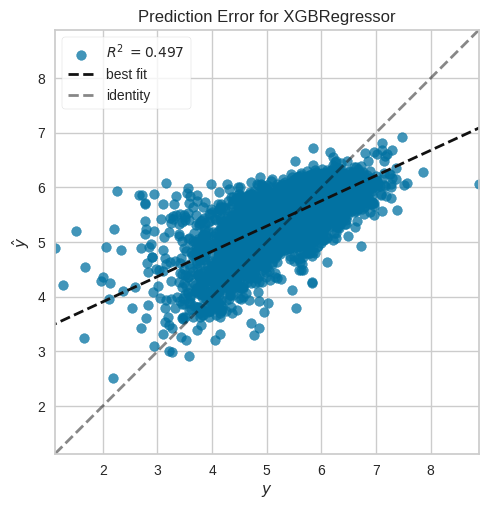

In [59]:
# Use YellowBrick to quickly to build a model and visualize its performance. The Loss reported in the plot below is the R^2 for the model
from yellowbrick.regressor import prediction_error, residuals_plot

X = np.stack(train.fp)
y = train.band_gap

test_X = np.stack(test.fp)
test_y = test.band_gap

visualizer = prediction_error(model,X,y,test_X,test_y)